In [1]:
# NOTE : this works only in py27, 
# because mechanize does not work 
# in py34 ...
# do

Aim to query CRTS DR2 with 100 objects at a time, try to see if I can quickly 

In [110]:
# Necessary imports ... 
import matplotlib.pyplot as plt
from astropy.table import Table
import os
import numpy as np
from astropy.io import fits
import re
import time
from mechanize import Browser
from mechanize import HTMLForm

Address : http://nesssi.cacr.caltech.edu/cgi-bin/getmulticonedb_release2.cgi

Code : 
      
    <form method="post" action="/cgi-bin/getmulticonedb_release2.cgi" enctype="multipart/form-data">
    
        <input type="file" name="upload_file"  size="30" maxlength="80" />
        <input type="text" name="Rad"  size="6" maxlength="10" 0.002 /> (deg < 0.02, default=0.002)
        <input type="checkbox" name="DB" value="photcat" checked="checked" />photcat
        <input type="checkbox" name="DB" value="orphancat" />orphancat
        <input type="submit" name=".submit" value="Submit" onclick="returnValidateAllFields(this.form);" />

In [111]:
# Works for TRILEGAL form ! 

br = Browser()
br.open("http://stev.oapd.inaf.it/cgi-bin/trilegal")
for form in br.forms():
    print "Form name:", form.name
    #print form
br.select_form(nr=0)
for control in br.form.controls:
    print control
    print "type=%s, name=%s " % (control.type, control.name)   

Form name: None
<SubmitControl(submit_form=Submit) (readonly)>
type=submit, name=submit_form 
<SubmitControl(reset_form=Reset) (readonly)>
type=submit, name=reset_form 
<HiddenControl(trilegal_version=1.6) (readonly)>
type=hidden, name=trilegal_version 
<RadioControl(gal_coord=[*1, 2])>
type=radio, name=gal_coord 
<TextControl(gc_l=0)>
type=text, name=gc_l 
<TextControl(gc_b=90)>
type=text, name=gc_b 
<TextControl(eq_alpha=0)>
type=text, name=eq_alpha 
<TextControl(eq_delta=0)>
type=text, name=eq_delta 
<TextControl(field=1)>
type=text, name=field 
<SelectControl(photsys_file=[tab_mag_odfnew/tab_mag_.dat, tab_mag_odfnew/tab_mag_2mass_spitzer_wise.dat, tab_mag_odfnew/tab_mag_2mass.dat, tab_mag_odfnew/tab_mag_ogle_2mass_spitzer.dat, tab_mag_odfnew/tab_mag_2mass_spitzer_wise_washington_ddo51.dat, *tab_mag_odfnew/tab_mag_ubvrijhk.dat, tab_mag_odfnew/tab_mag_bessell.dat, tab_mag_odfnew/tab_mag_akari.dat, tab_mag_odfnew/tab_mag_batc.dat, tab_mag_odfnew/tab_mag_megacam_wircam.dat, tab_mag_odf

In [109]:
# But doesn't work with CRTS ...
br = Browser()
br.set_handle_robots(False)
url = "http://nesssi.cacr.caltech.edu/cgi-bin/getmulticonedb_release2.cgi"
br.open(url)
br.select_form(nr=0)

<SubmitControl(submit_form=Submit) (readonly)>
type=submit, name=submit_form 
<SubmitControl(reset_form=Reset) (readonly)>
type=submit, name=reset_form 
<HiddenControl(trilegal_version=1.6) (readonly)>
type=hidden, name=trilegal_version 
<RadioControl(gal_coord=[*1, 2])>
type=radio, name=gal_coord 
<TextControl(gc_l=0)>
type=text, name=gc_l 
<TextControl(gc_b=90)>
type=text, name=gc_b 
<TextControl(eq_alpha=0)>
type=text, name=eq_alpha 
<TextControl(eq_delta=0)>
type=text, name=eq_delta 
<TextControl(field=1)>
type=text, name=field 
<SelectControl(photsys_file=[tab_mag_odfnew/tab_mag_.dat, tab_mag_odfnew/tab_mag_2mass_spitzer_wise.dat, tab_mag_odfnew/tab_mag_2mass.dat, tab_mag_odfnew/tab_mag_ogle_2mass_spitzer.dat, tab_mag_odfnew/tab_mag_2mass_spitzer_wise_washington_ddo51.dat, *tab_mag_odfnew/tab_mag_ubvrijhk.dat, tab_mag_odfnew/tab_mag_bessell.dat, tab_mag_odfnew/tab_mag_akari.dat, tab_mag_odfnew/tab_mag_batc.dat, tab_mag_odfnew/tab_mag_megacam_wircam.dat, tab_mag_odfnew/tab_mag_wirc

In [116]:

br = Browser()
br.set_handle_robots(False)
url = "http://nesssi.cacr.caltech.edu/cgi-bin/getmulticonedb_release2.cgi"
br.open(url)
for form in br.forms():
    print "Form name:", form.name
    #print form
br.select_form(nr=0)
for control in br.form.controls:
    print control
    print "type=%s, name=%s " % (control.type, control.name)   
    
br["Rad"] = 0.002

Form name: None


ControlNotFoundError: no control matching name 'Rad'

In [113]:
Hi!

I'm trying to submit a file to a form with mechanize. I tried following all advice I found on SO for similar questions, but it doesn't work in that  case and I'm trying to understand why. 

I tried : 
    
from mechanize import Browser
br = Browser()
br.set_handle_robots(False)
url = "http://nesssi.cacr.caltech.edu/cgi-bin/getmulticonedb_release2.cgi"
br.open(url)
for form in br.forms():
    print "Form name:", form.name

br.select_form(nr=0)

but trying to eg. set the value of "Rad" : 
    
br["Rad"] = 0.1

I get an error 

ControlNotFoundError: no control matching name 'Rad'
    
    
As I check with  

resp = br.open(url)
resp.read()

There is a form with method="post" action="/cgi-bin/getmulticonedb_release2.cgi" enctype="multipart/form-data',
and five inputs : file upload, text input, two checkboxes, and submit button. 

How can  I set the value of these controls?  

        <input type="file" name="upload_file"  size="30" maxlength="80" />
        <input type="text" name="Rad"  size="6" maxlength="10" 0.002 /> (deg < 0.02, default=0.002)
        <input type="checkbox" name="DB" value="photcat" checked="checked" />photcat
        <input type="checkbox" name="DB" value="orphancat" />orphancat
        <input type="submit" name=".submit" value="Submit" onclick="returnValidateAllFields(this.form);" />

'<!DOCTYPE html\n\tPUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n\t "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en-US" xml:lang="en-US">\n<head>\n<title>Positional MulitCone Search</title>\n<META HTTP-EQUIV="CACHE-CONTROL" CONTENT="NO-CACHE">\n<link rel="stylesheet" type="text/css" href="/DataRelease/main-v3.css" />\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />\n</head>\n<body link="#E1E10" alink="#ffff00" vlink="#00ffff" bgcolor="#00004f" text="#000000" charset="utf-7">\n<div class="wrapper">\n<table width="100%" border=0 bgcolor="#00007f"><tr><td valign="center">\n<div align=left><a href="http://www.lpl.arizona.edu/css/"><img src=/DataRelease/csslogo2_ss.jpg></a></div>\n<td><font size=6 color=white> The Catalina Surveys</font><td valign="top">\n<div align=right><a href="http://crts.caltech.edu"><img src=/DataRelease/CRTS_top.s.gif></a></div></tr></table>\n<center><p>\n<H3>Multi-Object Se

In [114]:
browser['Rad'] = 0.002
#print response.read()      # the text of the page
#response1 = br.response()  # get the response again
#print response1.read()  


AttributeError: mechanize._mechanize.Browser instance has no attribute __setitem__ (perhaps you forgot to .select_form()?)

In [115]:
form = br.select_form(nr=0)

In [ ]:
form.set_value()

In [95]:
for form in br.forms():
    print "Form name:", form.name
    print form

Form name: None
<post http://nesssi.cacr.caltech.edu/cgi-bin/getmulticonedb_release2.cgi multipart/form-data>


In [97]:
br.form = list(br.forms())[0] 

In [98]:
for control in br.form.controls:
    print control
    print "type=%s, name=%s value=%s" % (control.type, control.name, br[control.name])


https://www.pythonforbeginners.com/cheatsheet/python-mechanize-cheat-sheet

In [92]:
br = Browser()
br.set_handle_robots(False)
url = "http://nesssi.cacr.caltech.edu/cgi-bin/getmulticonedb_release2.cgi"
br.open(url)
#br.form = HTMLForm(url, method='post', enctype='multipart/form-data')

# what is the form_field_name?  
#br.form.new_control('file', form_field_name, {'id':form_field_id})
#br.form.new_control('submit', 'Button', {})
form = br.select_form(nr=1)


FormNotFoundError: no form matching nr 1

In [91]:
br.form.add_file(open(filename), 'text/plain', filename)

ControlNotFoundError: no control matching type 'file'

In [ ]:
filename = 's82_100_stars_test.txt' 
br.form.add_file(open(filename), 'text/plain', filename)
br.form.set_all_readonly(False)
br.form.fixup()

# Submit it!
response = br.submit()
html = response.read()                           

In [70]:
#on the site none of the forms have names, 
# so I have been using the index of the form to choose them
br.select_form(nr=0) # , method='POST', enctype='multipart/form-data')
filename = 's82_100_stars_test.txt' 
br.form.add_file(open(filename), 'text/plain',filename)

ControlNotFoundError: no control matching type 'file'

In [76]:
browser.form.new_control('file', form_field_name, {'id':form_field_id})
browser.form.new_control('submit', 'Button', {})
browser.form.add_file(open(image_filename), 'image/jpeg', image_filename,
id=form_field_id)
browser.form.set_all_readonly(False)
browser.form.fixup()

# Submit it!
response = browser.submit()
html = response.read()

<response_seek_wrapper at 0x11fcf9908 whose wrapped object = <closeable_response at 0x11fcbe830 whose fp = <socket._fileobject object at 0x11fcac1d0>>>


In [21]:
time.sleep(1)

In [23]:
print resp.info()  # headers
print resp.read()  # contents 

Date: Mon, 29 Oct 2018 23:14:03 GMT
Server: Apache/2.2.3 (Red Hat)
Connection: close
Transfer-Encoding: chunked
Content-Type: text/html; charset=ISO-8859-1
cache-control: no-cache
content-type: text/html; charset=iso-8859-1

<!DOCTYPE html
	PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
	 "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" lang="en-US" xml:lang="en-US">
<head>
<title>Positional MulitCone Search</title>
<META HTTP-EQUIV="CACHE-CONTROL" CONTENT="NO-CACHE">
<link rel="stylesheet" type="text/css" href="/DataRelease/main-v3.css" />
<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1" />
</head>
<body link="#E1E10" alink="#ffff00" vlink="#00ffff" bgcolor="#00004f" text="#000000" charset="utf-7">
<div class="wrapper">
<table width="100%" border=0 bgcolor="#00007f"><tr><td valign="center">
<div align=left><a href="http://www.lpl.arizona.edu/css/"><img src=/DataRelease/csslogo2_ss.jpg></a></div>
<td><font siz

In [3]:
# Read in the S82 catalog...
a1 = '../../CRTS_PROJECT/catalogs_SDSS/stripe82calibStars_v2.6.dat'
colnames = ['col1', 'RA','Dec','RArms','Decrms','Ntot','Ar', 
'uNobs','umed', 'ummu', 'umsig', 'umrms', 'umchi2',
'gNobs','gmed', 'gmmu', 'gmsig', 'gmrms', 'gmchi2',
'rNobs','rmed', 'rmmu', 'rmsig', 'rmrms', 'rmchi2',
'iNobs','imed', 'immu', 'imsig', 'imrms', 'imchi2',
'zNobs','zmed', 'zmmu', 'zmsig', 'zmrms', 'zmchi2']

s82 = Table.read(a1, format='ascii', names=colnames)

In [6]:
s82['id'] = np.arange(len(s82))

In [13]:
# choose at random a subset of 100 000 stars ...
idx = np.random.choice(s82['id'].data, size=100000, replace = False)
# without replacement, so that len(np.unique(idx)) == 100 000 
subset = s82[idx]


In [17]:
plt.hexbin?

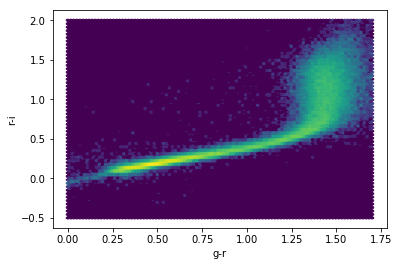

In [21]:
%matplotlib inline
plt.hexbin(subset['gmed'] - subset['rmed'] , 
           subset['rmed'] - subset['imed'],
          extent = (0.0, 1.7, -0.5, 2.0),
          bins = 'log')
plt.xlabel('g-r')
plt.ylabel('r-i')

Looks good! Shows I'm not selecting anything special... 

In [ ]:
# Make a short list of stars ...
address = '../../CRTS_PROJECT/data_products/CRTS_SDSS_combined_stars_catalog.dat'
s82_stars = Table.read(address, format='ascii')

In [34]:
subset.meta.clear()

In [38]:
Table.write?

In [39]:
subset['id', 'RA', 'Dec'][:100].write('s82_100_stars_test.txt', format='ascii.no_header',
                                     overwrite=True)

In [44]:
br['upload_file'] = 's82_100_stars_test.txt'

ControlNotFoundError: no control matching name 'upload_file'

In [45]:
for form in br.forms():                                                   
    print "Form name:", form.name                                         
    print form

Form name: None
<post http://nesssi.cacr.caltech.edu/cgi-bin/getmulticonedb_release2.cgi multipart/form-data>
